Input Samples =  [[0.08 0.78 0.44 0.72 0.98 0.54 0.5  0.07 0.27 0.5  0.68 0.8  0.38 0.07
  0.29 0.91 0.21 0.45 0.93 0.02 0.6  0.95 0.23 0.55 0.91 0.13 0.52 0.75
  0.67 0.47 0.2  0.49 0.37 0.48 0.37 0.84 0.77 0.31 0.57 0.28 0.45 0.35
  0.66 0.37 0.46 0.72 0.41 0.91 0.18 0.74]]
Actual values of y = [[3.90237404 8.10645357 6.27437987 7.8429062  9.29488598 6.24142688
  6.09226235 4.12939439 5.1443456  6.69616046 8.03546832 8.48291385
  5.33312869 3.72885268 5.33259469 8.69512041 5.224971   6.64504822
  9.42840088 3.592324   7.44147671 8.83111064 4.68873366 6.76299639
  9.2018472  4.26582523 6.25687612 7.84353653 7.34442617 6.1204189
  4.3655014  6.35490177 5.66812066 6.65490038 6.0163907  8.56239013
  8.0806303  5.6382136  7.30728895 5.35491877 6.50047905 6.03911135
  7.00065581 6.09567172 6.03656307 7.7957645  6.25676096 9.17724223
  4.22714757 8.09874826]] 

Actual Parameters = [6] 3 

Loss at 0 th epoch = 56.31170580813443
Loss at 100 th epoch = 0.40294964830962654
Loss at 200 th epoch 

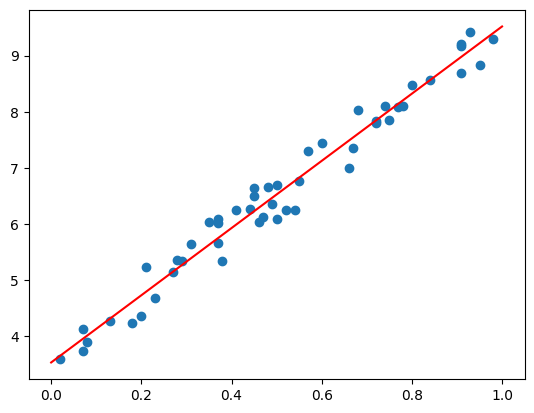

In [15]:
#Linear Regression using single and multiple variables
#Important point: The learning rate is influenced by the number of samples and the values of the samples
##Loss function for Linear regression = Least mean squared (h(x)-y)^(2)/2
import numpy as np
import random
import matplotlib.pyplot as plt
##Class to implement Linear Regression
class LinearRegression:
    def __init__(self,samples,features,learning_rate,epochs,noise):
        self.X_samples = samples              # Number of Samples = self.X_samples
        self.X_features = features            # Number of features = self.X_features
        self.learning_rate = learning_rate    # Learning Rate = self.learning_rate
        self.epochs = epochs                  # Iterations = self.epochs
        self.noise = noise                    # Influence of noise = self.noise 
    
    def XSamples(self,Xshow=0): ## Set show ==1 to display the values of input samples
        ## Create a random Data sample for X using the number of samples and the number of features  
        X_train = np.round(np.random.uniform(0,1,(self.X_samples,self.X_features)),2) ## The values of samples range from 0 -1 and and rounded off to 2 decimal places
        if Xshow == 1:
            print('Input Samples = ',X_train.T)
        return X_train 
    def ySamples(self,X,yshow=0,wshow=0): ## Set show == 1 to diplay the ouput label for the samples
        ## Create the output samples for the input samples.
        ## y = w1x1+w2x2+w3x3+......wnxn+b (Equation of linear Reression)
        ## Use random weight values to obtain the values of [w1,w2,w3,...,wn] for the output y
        temp = np.zeros(X.shape)                ## Create temporary numpy array with shape of X
        w = []
        for i in range(self.X_features):
            w.append(random.randint(1,10))      ## w = random variable = random_value(between 1-10)
            temp[:,i] = w[i]*X[:,i]                 ## Multiply the values of each column of X with w(wiXi)
        b = np.array(random.randint(1,10))       ##b = (random value between 1-10)
        y = np.array([np.sum(temp,axis=1)]).T+b  ## y = summation(wixi) + b
        y_actual = y+self.noise*np.random.random((y.shape)) ## Add some noise to the value of y
        if yshow==1:
            print('Actual values of y =',y_actual.T,'\n')
        if wshow==1:
            print('Actual Parameters =',w,b,'\n')
        return y_actual

    def forwardPropagation(self,X,w,b):
        ##Calcluate the value of linear regression variable for training
        ## z = Xw+b - Equation of the regression variable
        return np.dot(X,w.T)+b
    
    def derivative(self,X,y,z):
         ##Find the derivatives for back propagation
        ## dL = dL/dz, dz = dz/dw
        ## dL/dw = (dL/dz)*(dz/dw)
        ## dL/db = (dl/dz)*(dz/db)
        dL = (y-z)/self.X_samples
        dz = X
        return (dL,dz)
    
    def backwardPropagation(self,dL,dz):
        ##Back propagation to get dw = dJ/dw and db = dJ/db
        #print(dJ.shape,dz_w.shape,dz_b.shape)
        dw = np.dot(dL.T,dz)
        # print(dw.shape)
        db = np.sum(dL)
        # print(db.shape)
        return (dw,db)
    
    def randomWeightsandBias(self,X):
        ##Initialize the weights and bias to any random values between -1 to 1
        w = np.random.uniform(-1,1,(1,X.shape[1]))
        b = np.random.uniform(-1,1,(1,1))
        return (w,b)
    
    def displayGraph(self,w,b,X,y):
        ## Function to plot the graph if only one feature
        X_axis = np.linspace(0,1,100).reshape(100,1)
        y_axis = (np.dot(w,X_axis.T)+b).T
        plt.scatter(np.ravel(X),y)
        plt.plot(X_axis,y_axis,color='red')

    ##Train the model
    def train_model(self,show_loss=0,Xshow=0,yshow=0,wshow=0,seed=0):  ##Pass the show values to show the losses,inputs,output labels and weights and seed
        np.random.seed(seed)
        random.seed(seed)
        X = self.XSamples(Xshow)                                       ##Get the input values
        y = self.ySamples(X,yshow=yshow,wshow=wshow)                   ##Get output values corresponding to input for linear regression
        (w,b) = self.randomWeightsandBias(X)                           ##Get the random weights and bias values
        ##Training the model over epochs number of iterations
        for i in range(self.epochs):
            z = self.forwardPropagation(X,w,b)                         ##Calculate thw regression variable after each iterations
            if i%100 == 0 and show_loss==1:                            ##Set show_loss == 1 to display the loss after certain iterations
                loss = np.sum(np.square(y-z))/self.X_samples
                print('Loss at',i,'th epoch =',loss)                   ##Print the loss values after 100 iterations
            (dL,dz) = self.derivative(X,y,z)                           ##Derivativecs for back propagations
            (dw,db) = self.backwardPropagation(dL,dz)                  ##Get dw and db

            w = w+self.learning_rate*dw                                ##Update weights after each iteration
            b = b+self.learning_rate*db                                ##Update bias after each iteration
        print('Learned Parameters =',w,b)                              ##Print final weights and bias values
        if self.X_features == 1:                                       ##Plot graph if only one feature
            self.displayGraph(w,b,X,y) 

##Instantiate the object
lr = LinearRegression(samples=50,features=1,
                      learning_rate=0.1,
                      epochs=5000,noise=1)
lr.train_model(show_loss=1,Xshow=1,yshow=1,wshow=1,seed=7)